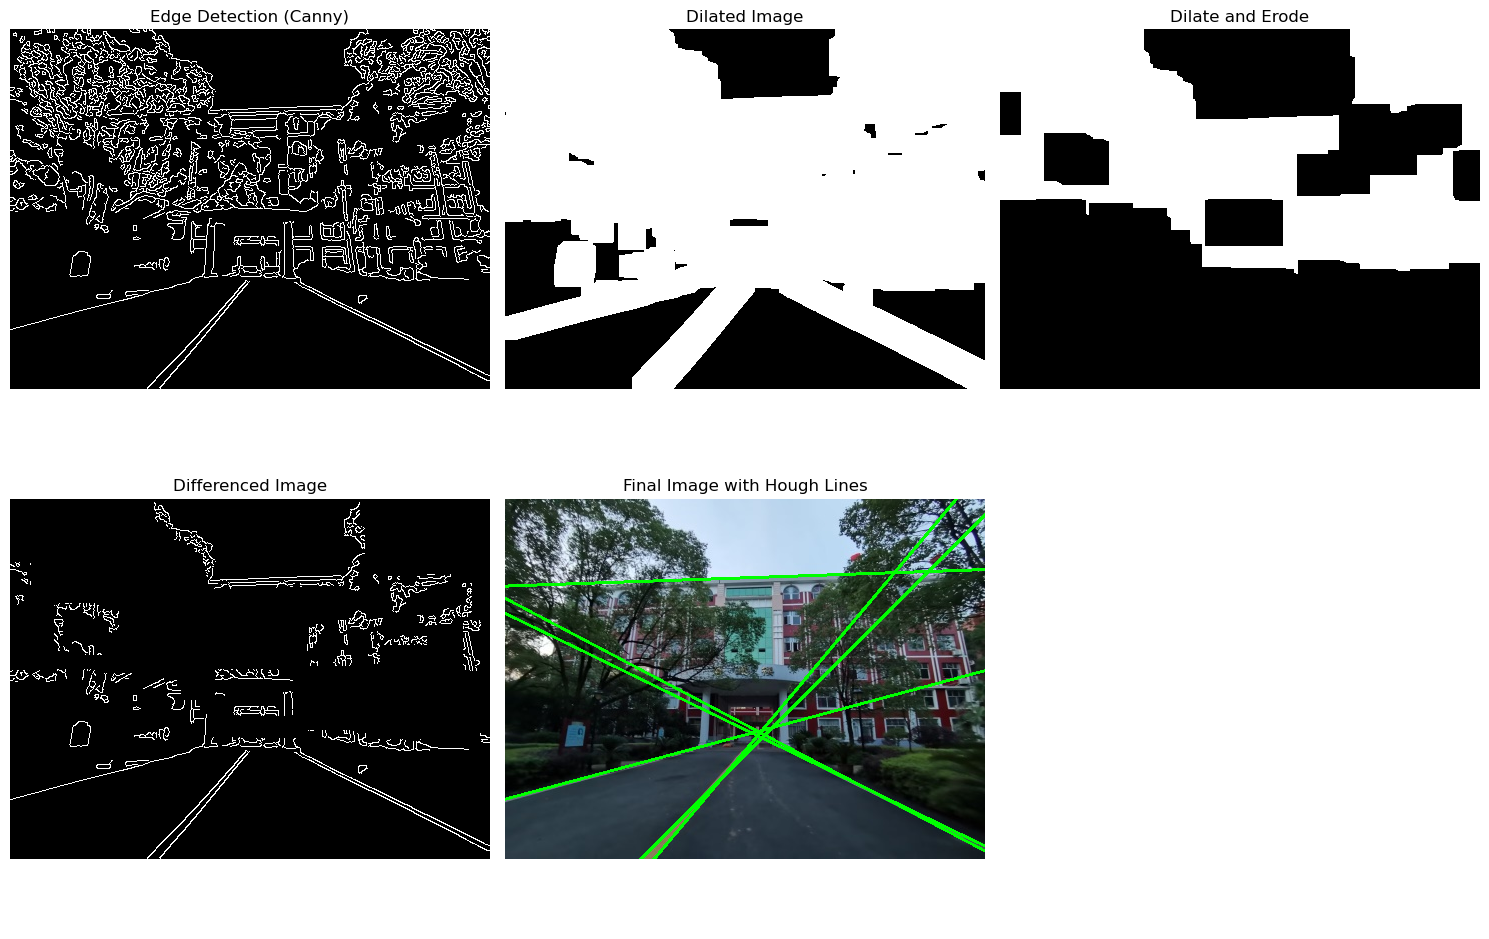

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('./test2.jpg')

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 应用高斯模糊以减少噪声
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Canny边缘检测得到处理的二值图像
edges = cv2.Canny(blurred, 50, 150)

# 膨胀处理
kernel = np.ones((3, 3), np.uint8)
after_dilate = cv2.dilate(edges, kernel, iterations=10)

# 腐蚀处理
after_erode = cv2.erode(after_dilate, kernel, iterations=20)

# 差异化处理
difference = cv2.subtract(edges, after_erode)


# kernel2 = np.array([[2,  2,  2],
#                    [ -1, -1, -1],
#                    [2,  2,  2]], dtype=np.float32)

# difference = cv2.filter2D(difference, -1, kernel2)

# _, difference = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)





# 获取图像的尺寸
height, width = difference.shape

# 霍夫变换检测直线
r_max = int(math.sqrt(width ** 2 + height ** 2))  # 最大半径值
accumulator = np.zeros((2 * r_max, 180), dtype=int)  # 初始化霍夫变换的累加器

# 遍历图像中的每个边缘点
for y in range(height):
    for x in range(width):
        if difference[y, x] != 0:  # 只对边缘点进行霍夫变换
            for theta in range(0, 180):  # 角度范围从0到179
                r = int(x * np.cos(np.deg2rad(theta)) + y * np.sin(np.deg2rad(theta)))  # 计算r值
                r_idx = r + r_max  # 处理r值的偏移
                accumulator[r_idx, theta] += 1  # 增加累加器的投票值

# 设置阈值，过滤掉噪声
threshold = 100
lines = []
for r_idx in range(accumulator.shape[0]):
    for theta in range(accumulator.shape[1]):
        if accumulator[r_idx, theta] > threshold:  # 如果该位置的投票数大于阈值
            r = r_idx - r_max  # 还原r值
            theta = np.deg2rad(theta)  # 转换为弧度
            # 计算直线的两个端点
            x1 = int(r * np.cos(theta) - 1000 * np.sin(theta))
            y1 = int(r * np.sin(theta) + 1000 * np.cos(theta))
            x2 = int(r * np.cos(theta) + 1000 * np.sin(theta))
            y2 = int(r * np.sin(theta) - 1000 * np.cos(theta))

            # 存储检测到的直线
            lines.append((x1, y1, x2, y2))

# 合并重复的直线（采用一个容忍度阈值）
def merge_lines(lines, angle_threshold=20, distance_threshold=30):
    merged_lines = []
    for line in lines:
        x1, y1, x2, y2 = line
        line_found = False
        for i, (mx1, my1, mx2, my2) in enumerate(merged_lines):
            # 计算两个线段之间的角度差和距离差
            angle1 = math.atan2(y2 - y1, x2 - x1)
            angle2 = math.atan2(my2 - my1, mx2 - mx1)
            angle_diff = abs(angle1 - angle2) * 180 / np.pi
            distance = abs((x2 - x1) * (my1 - y1) - (y2 - y1) * (mx1 - x1)) / math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

            if angle_diff < angle_threshold and distance < distance_threshold:
                # 合并直线
                merged_lines[i] = (min(x1, mx1), min(y1, my1), max(x2, mx2), max(y2, my2))
                line_found = True
                break
        if not line_found:
            merged_lines.append(line)
    return merged_lines

# 合并直线
merged_lines = merge_lines(lines)

# 在原图上绘制合并后的直线
for line in merged_lines:
    x1, y1, x2, y2 = line
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 将图像从BGR转换为RGB，以便matplotlib正确显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 创建一个包含多个子图的图像
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 依次显示每一步的结果
axes[0, 0].imshow(edges,cmap='gray')
axes[0, 0].set_title('Edge Detection (Canny)')
axes[0, 0].axis('off')

axes[0, 1].imshow(after_dilate,cmap='gray')
axes[0, 1].set_title('Dilated Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(after_erode,cmap='gray')
axes[0, 2].set_title('Dilate and Erode')
axes[0, 2].axis('off')

axes[1, 0].imshow(difference,cmap='gray')
axes[1, 0].set_title('Differenced Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(image_rgb)
axes[1, 1].set_title('Final Image with Hough Lines')
axes[1, 1].axis('off')

# 隐藏空白的最后一个子图
axes[1, 2].axis('off')

# 显示所有图像
plt.tight_layout()
plt.show()


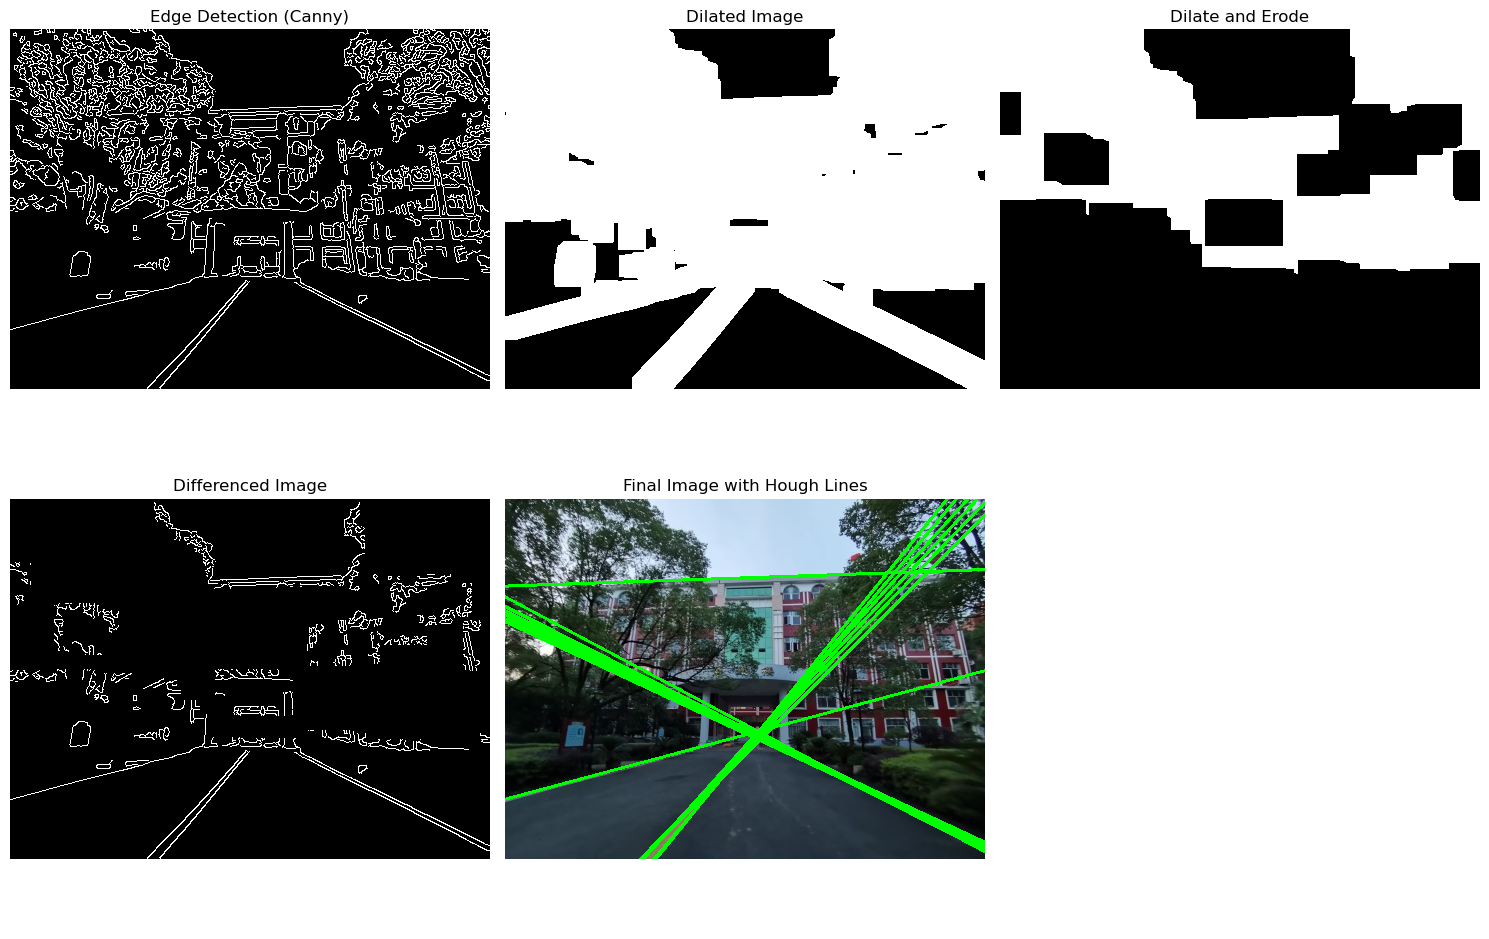

In [7]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('./test2.jpg')

# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 应用高斯模糊以减少噪声
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Canny边缘检测得到处理的二值图像
edges = cv2.Canny(blurred, 50, 150)

# 膨胀处理
kernel = np.ones((3, 3), np.uint8)
after_dilate = cv2.dilate(edges, kernel, iterations=10)

# 腐蚀处理
after_erode = cv2.erode(after_dilate, kernel, iterations=20)

# 差异化处理
difference = cv2.subtract(edges, after_erode)

# 获取图像的尺寸
height, width = difference.shape

# 霍夫变换检测直线
r_max = int(math.sqrt(width ** 2 + height ** 2))  # 最大半径值
accumulator = np.zeros((2 * r_max, 180), dtype=int)  # 初始化霍夫变换的累加器

# 遍历图像中的每个边缘点
for y in range(height):
    for x in range(width):
        if difference[y, x] != 0:  # 只对边缘点进行霍夫变换
            for theta in range(0, 180):  # 角度范围从0到179
                r = int(x * np.cos(np.deg2rad(theta)) + y * np.sin(np.deg2rad(theta)))  # 计算r值
                r_idx = r + r_max  # 处理r值的偏移
                accumulator[r_idx, theta] += 1  # 增加累加器的投票值

# 设置阈值，过滤掉噪声
threshold = 100
for r_idx in range(accumulator.shape[0]):
    for theta in range(accumulator.shape[1]):
        if accumulator[r_idx, theta] > threshold:  # 如果该位置的投票数大于阈值
            r = r_idx - r_max  # 还原r值
            theta = np.deg2rad(theta)  # 转换为弧度
            # 计算直线的两个端点
            x1 = int(r * np.cos(theta) - 1000 * np.sin(theta))
            y1 = int(r * np.sin(theta) + 1000 * np.cos(theta))
            x2 = int(r * np.cos(theta) + 1000 * np.sin(theta))
            y2 = int(r * np.sin(theta) - 1000 * np.cos(theta))

            # 在原图像上绘制检测到的直线
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 将图像从BGR转换为RGB，以便matplotlib正确显示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# 创建一个包含多个子图的图像
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 依次显示每一步的结果
axes[0, 0].imshow(edges,cmap='gray')
axes[0, 0].set_title('Edge Detection (Canny)')
axes[0, 0].axis('off')

axes[0, 1].imshow(after_dilate,cmap='gray')
axes[0, 1].set_title('Dilated Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(after_erode,cmap='gray')
axes[0, 2].set_title('Dilate and Erode')
axes[0, 2].axis('off')

axes[1, 0].imshow(difference,cmap='gray')
axes[1, 0].set_title('Differenced Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(image_rgb)
axes[1, 1].set_title('Final Image with Hough Lines')
axes[1, 1].axis('off')

# 隐藏空白的最后一个子图
axes[1, 2].axis('off')

# 显示所有图像
plt.tight_layout()
plt.show()
